In [1]:
import numpy as np
import numpy.linalg as la
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
mnist = sp.io.loadmat('mnist.mat')
print(mnist.keys())
A = mnist['imgs_test']
Ax, Ay, Az = A.shape
print(Ax,Ay,Az)
labels = mnist['labels_test']
print(labels.shape)
labels = labels.reshape(Az)
print(labels.shape)
# Az == labels.shape

dict_keys(['__header__', '__version__', '__globals__', 'imgs_test', 'imgs_train', 'labels_test', 'labels_train'])
20 20 10000
(10000, 1)
(10000,)


In [3]:
# reshape A
A = A.transpose(2,0,1).reshape(Az,-1)
print(A.shape)

(10000, 400)


In [4]:
# SVD of imgs
U, S, Vh = la.svd(A, full_matrices=False)
print(U.shape,S.shape,Vh.shape)

(10000, 400) (400,) (400, 400)


In [5]:
# first two right singular vectors
v1 = Vh[0,:]
v2 = Vh[1,:]
print(v1.shape,v2.shape)

(400,) (400,)


In [7]:
# project data onto span(v1,v2)
proj_v1 = A@v1
proj_v2 = A@v2

In [8]:
# pick projections with label 0,1
proj_v1_0 = proj_v1[labels==0]
proj_v2_0 = proj_v2[labels==0]
proj_v1_1 = proj_v1[labels==1]
proj_v2_1 = proj_v2[labels==1]

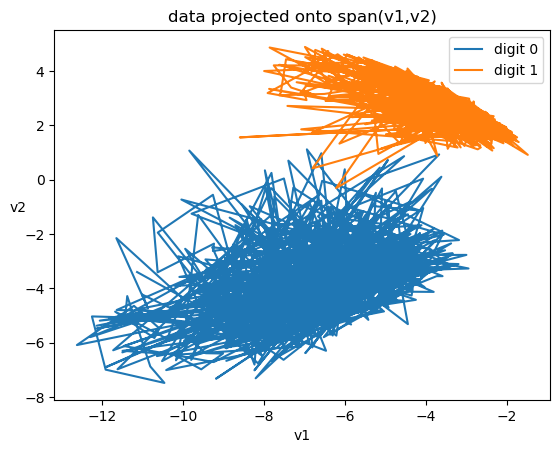

In [9]:
# plot projections
plt.title('data projected onto span(v1,v2)')
plt.xlabel('v1')
plt.ylabel('v2', rotation=0)
plt.plot(proj_v1_0, proj_v2_0, label='digit 0')
plt.plot(proj_v1_1, proj_v2_1, label='digit 1')
plt.legend()
plt.savefig('hw3 projection.png')
plt.show()

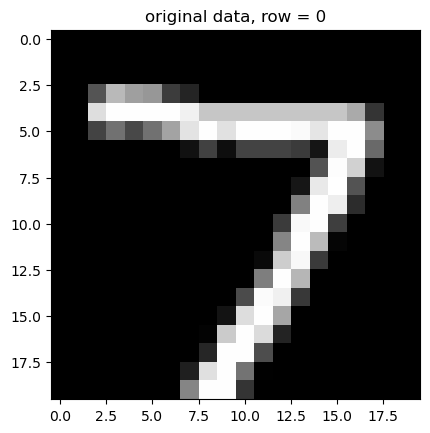

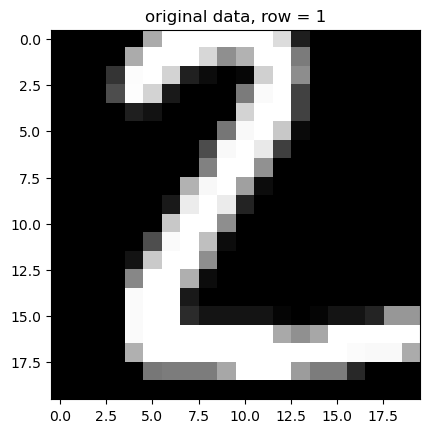

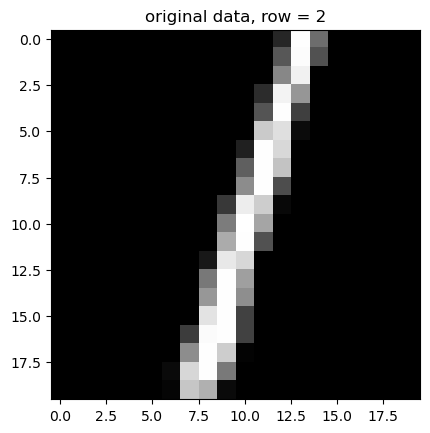

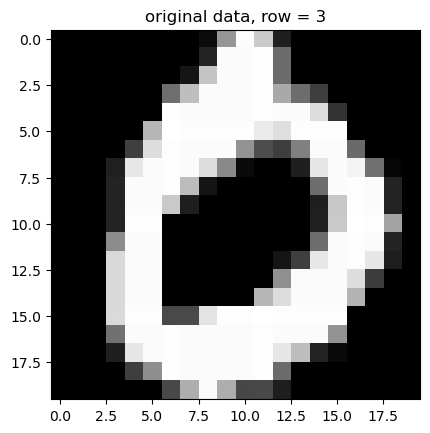

(10000, 10) (10, 10) (10, 400)


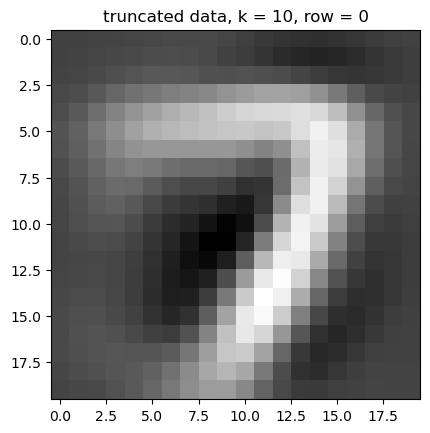

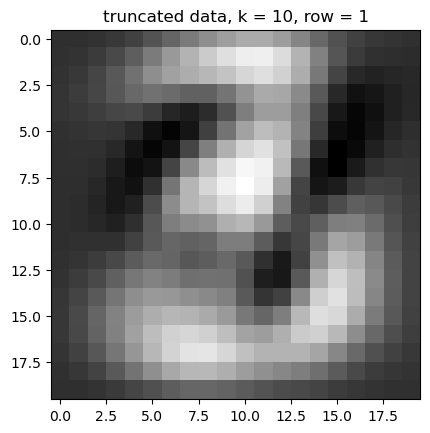

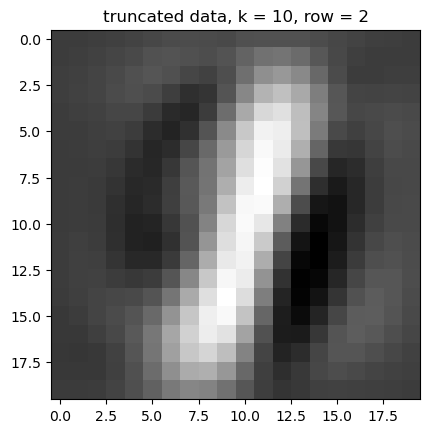

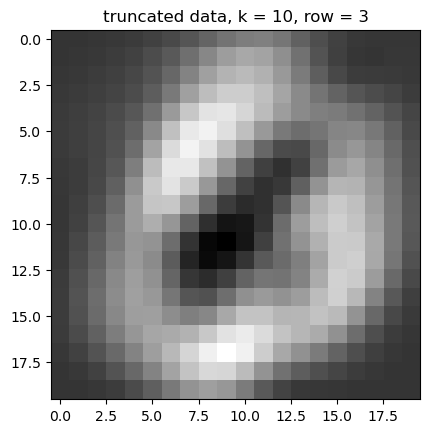

(10000, 20) (20, 20) (20, 400)


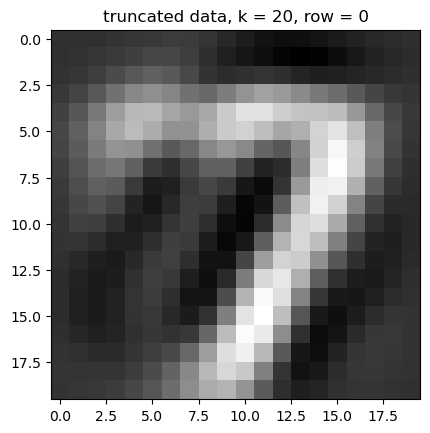

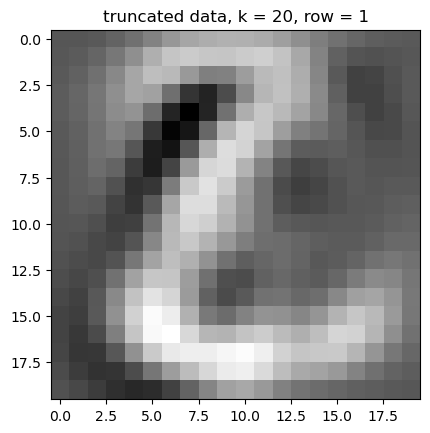

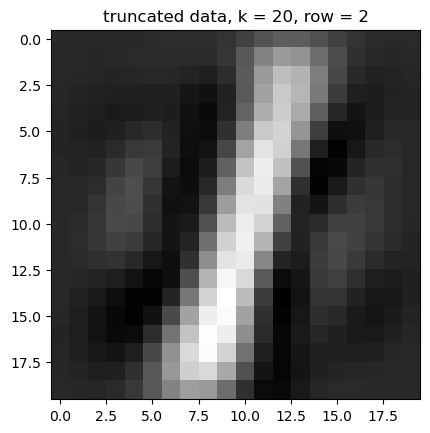

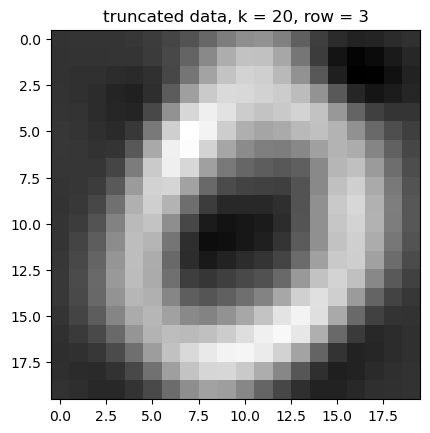

(10000, 50) (50, 50) (50, 400)


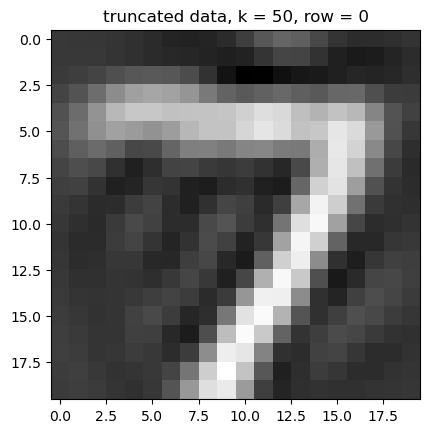

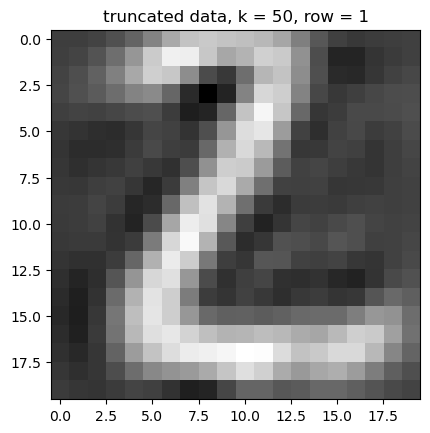

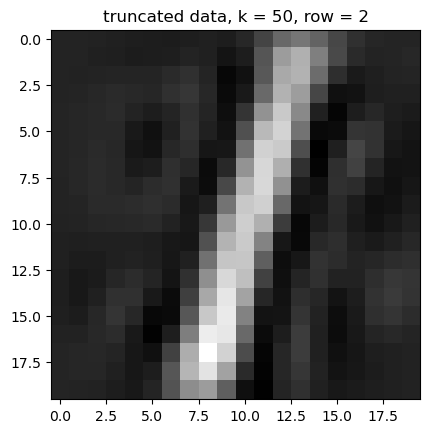

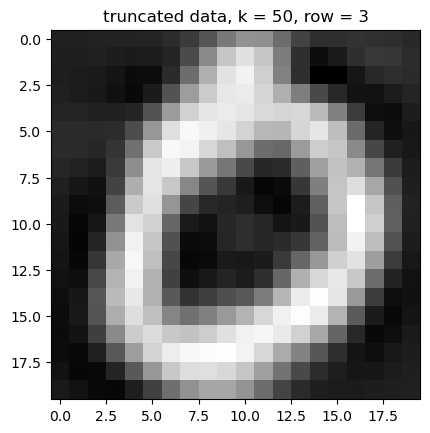

In [24]:
sample_size = 4

for row in range(sample_size):
    A_sample = A[row,:]
    A_sample = A_sample.reshape((Ax,Ay))
    plt.imshow(A_sample, cmap='gray')
    plt.title('original data, row = {}'.format(row))
    plt.savefig('hw3 orig, row = {}.png'.format(row))
    plt.show()

for k in [10,20,50]:
    Uk = U[:,:k]
    Sk = np.diag(S[:k])
    Vhk = Vh[:k,:]
    print(Uk.shape,Sk.shape,Vhk.shape)
    Ak = Uk@Sk@Vhk
    for row in range(sample_size):
        Ak_sample = Ak[row,:]
        Ak_sample = Ak_sample.reshape((Ax,Ay))
        plt.imshow(Ak_sample, cmap='gray')
        plt.title('truncated data, k = {}, row = {}'.format(k,row))
        plt.savefig('hw3 trunc, k = {}, row = {}.png'.format(k,row))
        plt.show()